https://www.kaggle.com/datasets/asaniczka/wages-by-education-in-the-usa-1973-2022/data

4. Examine the relationship between wages and economic indicators such as inflation and GDP.

In [125]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

# Suppress specific FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [126]:
def fetch_fred_data(api_key, series_id, start_year, end_year):
    url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json&observation_start={start_year}-01-01&observation_end={end_year}-12-31'
    for attempt in range(3):  # Retry up to 3 times
        try:
            response = requests.get(url)
            response.raise_for_status()  # Check for HTTP errors
            data = response.json()  # Parse the JSON response
            df = pd.DataFrame(data['observations'])  # Convert observations to DataFrame
            df['value'] = pd.to_numeric(df['value'], errors='coerce')  # Convert values to numeric
            return df
        except requests.exceptions.HTTPError as http_err:
            print(f"HTTP error occurred: {http_err}")
            if attempt < 2:
                print("Retrying...")
                time.sleep(5)  # Wait for 5 seconds before retrying
            else:
                print("Failed after 3 attempts.")
        except Exception as err:
            print(f"Other error occurred: {err}")
            break


In [127]:
# Set the API key and series IDs for inflation and GDP data
api_key = '4d30718c1bf6319536dde67cbd54a459'  # Replace with your actual FRED API key
inflation_series_id = 'CPIAUCSL'  # Consumer Price Index for All Urban Consumers
gdp_series_id = 'GDP'  # Gross Domestic Product
start_year = 2018
end_year = 2022

In [119]:
# Fetching GDP data
gdp_data = fetch_fred_data(api_key, gdp_series_id, start_year, end_year)
if gdp_data is not None:
    print("GDP Data:")
    print(gdp_data.head())

GDP Data:
  realtime_start realtime_end        date      value
0     2024-05-15   2024-05-15  2018-01-01  20328.553
1     2024-05-15   2024-05-15  2018-04-01  20580.912
2     2024-05-15   2024-05-15  2018-07-01  20798.730
3     2024-05-15   2024-05-15  2018-10-01  20917.867
4     2024-05-15   2024-05-15  2019-01-01  21104.133


In [106]:
# Fetch the inflation data using the defined function and display the first few rows
inflation_data = fetch_fred_data(api_key, inflation_series_id, start_year, end_year)
inflation_data.head()

,realtime_start,realtime_end,date,value
0,2024-05-13,2024-05-13,2018-01-01,248.859
1,2024-05-13,2024-05-13,2018-02-01,249.529
2,2024-05-13,2024-05-13,2018-03-01,249.577
3,2024-05-13,2024-05-13,2018-04-01,250.227
4,2024-05-13,2024-05-13,2018-05-01,250.792


In [107]:
# Fetch the GDP data using the defined function and display the first few rows
gdp_data = fetch_fred_data(api_key, gdp_series_id, start_year, end_year)
gdp_data.head()


,realtime_start,realtime_end,date,value
0,2024-05-13,2024-05-13,2018-01-01,20328.553
1,2024-05-13,2024-05-13,2018-04-01,20580.912
2,2024-05-13,2024-05-13,2018-07-01,20798.730
3,2024-05-13,2024-05-13,2018-10-01,20917.867
4,2024-05-13,2024-05-13,2019-01-01,21104.133


In [108]:
# Convert the 'date' column to datetime format
inflation_data['date'] = pd.to_datetime(inflation_data['date'])
# Extract the year from the 'date' column
inflation_data['year'] = inflation_data['date'].dt.year
# Calculate the annual average inflation rate
annual_inflation = inflation_data.groupby('year')['value'].mean().reset_index()
annual_inflation.columns = ['year', 'avg_inflation']
# Display the first few rows of the processed inflation data
annual_inflation.head()


,year,avg_inflation
0,2018,251.099500
1,2019,255.652583
2,2020,258.846167
3,2021,270.965833
4,2022,292.620583


In [109]:
# Convert the 'date' column to datetime format
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
# Extract the year from the 'date' column
gdp_data['year'] = gdp_data['date'].dt.year
# Calculate the annual average GDP
annual_gdp = gdp_data.groupby('year')['value'].mean().reset_index()
annual_gdp.columns = ['year', 'avg_gdp']
# Display the first few rows of the processed GDP data
annual_gdp.head()


,year,avg_gdp
0,2018,20656.51550
1,2019,21521.39500
2,2020,21322.94950
3,2021,23594.03075
4,2022,25744.10825


In [110]:
# Load the wages data from a CSV file and display the first few rows
wages_df = pd.read_csv('wages_by_education.csv')
wages_df.head()


,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [114]:
# Merge the wages data with the processed inflation and GDP data on the 'year' column
merged_df = wages_df.merge(annual_inflation, on='year').merge(annual_gdp, on='year')
# Display the first few rows of the merged dataframe
merged_df.head()


,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree,avg_inflation,avg_gdp
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64,292.620583,25744.10825
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47,270.965833,23594.03075
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15,258.846167,21322.94950
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30,255.652583,21521.39500
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35,251.099500,20656.51550


In [115]:
# Save the merged dataframe to a CSV file
merged_df.to_csv('merged_data.csv', index=False)
print("Merged data saved to 'merged_data.csv'")

Merged data saved to 'merged_data.csv'


In [112]:
# Calculate the correlation matrix for the merged dataframe
correlations = merged_df.corr()
# Display the correlations of inflation and GDP with other variables
print("Correlations:")
print(correlations[['avg_inflation', 'avg_gdp']])


Correlations:
                                 avg_inflation   avg_gdp
year                                  0.932100  0.927447
less_than_hs                          0.349555  0.307704
high_school                           0.183493  0.136957
some_college                          0.438044  0.387252
bachelors_degree                      0.685258  0.648180
...                                        ...       ...
hispanic_women_some_college           0.619410  0.626760
hispanic_women_bachelors_degree       0.551278  0.521514
hispanic_women_advanced_degree       -0.106145 -0.114604
avg_inflation                         1.000000  0.989335
avg_gdp                               0.989335  1.000000

[63 rows x 2 columns]


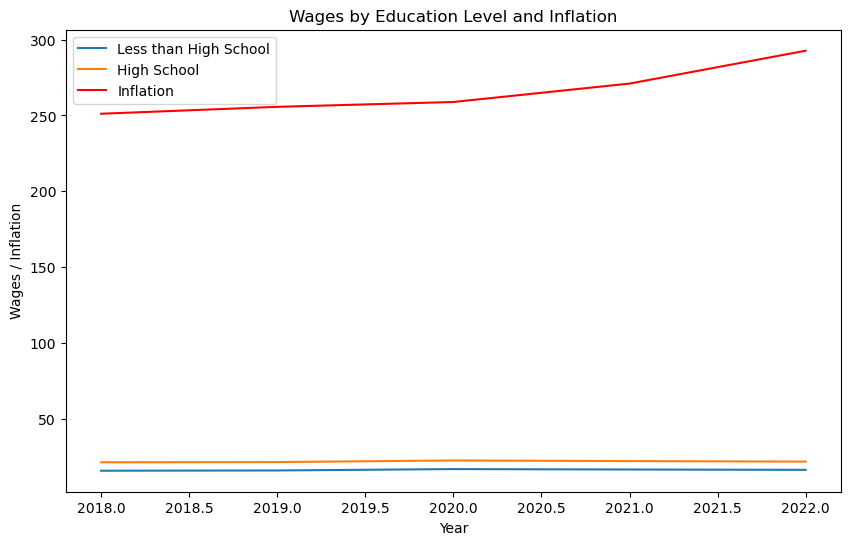

In [113]:
# Replace infinite values with NaN
merged_df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
# Create a line plot to visualize the relationship between wages, inflation, and GDP over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='year', y='less_than_hs', label='Less than High School')
sns.lineplot(data=merged_df, x='year', y='high_school', label='High School')
sns.lineplot(data=merged_df, x='year', y='avg_inflation', label='Inflation', color='red')
plt.title('Wages by Education Level and Inflation')
plt.xlabel('Year')
plt.ylabel('Wages / Inflation')
plt.legend()
plt.show()


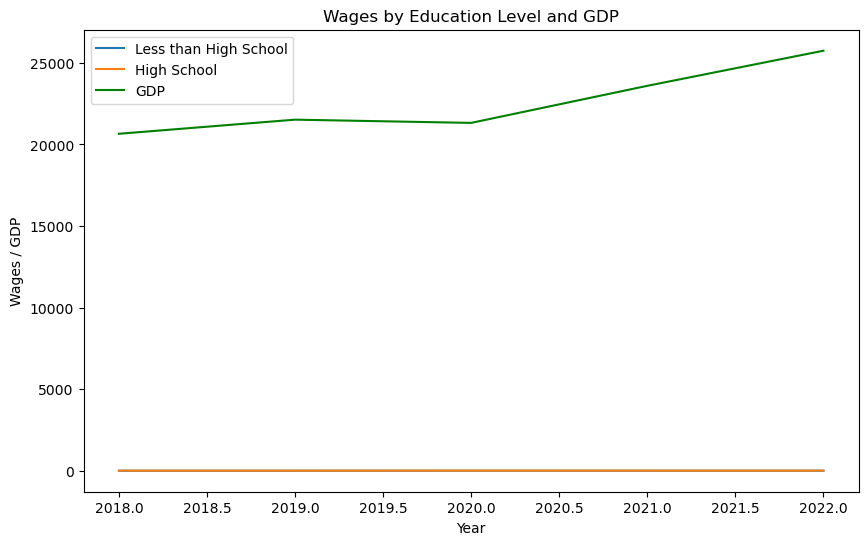

In [120]:
# Replace infinite values with NaN
merged_df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Create line plots to visualize the relationship between wages and GDP
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='year', y='less_than_hs', label='Less than High School')
sns.lineplot(data=merged_df, x='year', y='high_school', label='High School')
sns.lineplot(data=merged_df, x='year', y='avg_gdp', label='GDP', color='green')
plt.title('Wages by Education Level and GDP')
plt.xlabel('Year')
plt.ylabel('Wages / GDP')
plt.legend()
plt.show()


In [124]:
# Normalize the wage columns
wage_columns = ['less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'advanced_degree']
wages_df[wage_columns] = (wages_df[wage_columns] - wages_df[wage_columns].min()) / (wages_df[wage_columns].max() - wages_df[wage_columns].min())

# Load the inflation data
inflation_df = 

# Normalize the inflation data
inflation_df['value'] = (inflation_df['value'] - inflation_df['value'].min()) / (inflation_df['value'].max() - inflation_df['value'].min())

# Merge the data on the year column
merged_df = pd.merge(wages_df, inflation_df, left_on='year', right_on='date', how='inner')

# Plot the normalized wages and inflation data
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='year', y='less_than_hs', label='Less than High School')
sns.lineplot(data=merged_df, x='year', y='high_school', label='High School')
sns.lineplot(data=merged_df, x='year', y='some_college', label='Some College')
sns.lineplot(data=merged_df, x='year', y='bachelors_degree', label="Bachelor's Degree")
sns.lineplot(data=merged_df, x='year', y='advanced_degree', label='Advanced Degree')
sns.lineplot(data=merged_df, x='year', y='value', label='Inflation', color='red')
plt.title('Normalized Wages by Education Level and Inflation')
plt.xlabel('Year')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()

NameError: name 'inflation_df' is not defined